**Описание проекта**<br>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats as st

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.head(2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


# Шаг 2. Подготовьте данные

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**2.1. Приведение названия столбцов к нижнему регистру**

In [5]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2. Изучение названий платформ**

In [6]:
print(data['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


**2.3. Проверка названия игр на уникальность по регистру**

In [7]:
print(data['name'].unique())
print(len(data['name'].unique()))
data['new_name'] = data['name'].str.lower()
len(data['new_name'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
11560


11560

**2.4. проверка проверка пустых значений**

In [8]:
data=data.drop('new_name', axis=1)

Проверка пустых значение в данных

In [9]:
def check_isna(df, column):
    to_print = df[df[column].isna()].sort_values(by=[column])
    len_isna = len(to_print)
    print(f"{column} 'isna': {len_isna}")
    print(to_print)

In [10]:
for i in data.columns:
    check_isna(data, i)

name 'isna': 2
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  
platform 'isna': 0
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
year_of_release 'isna': 269
                                    name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     26

In [11]:
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data['critic_score'] = pd.to_numeric(data['critic_score'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**2.5. Убираются данные с пропущенным названием**

In [12]:
data = data[data['name'].isna()==False].reset_index(drop=True)

Добавляется год исходя из названия игры

In [13]:
data.loc[(data['name'].str.contains('2K')) & (data['year_of_release'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6623,College Hoops 2K6,PS2,NaN,Sports,0.12,0.1,0.0,0.03,77.0,7.3,E
9875,Major League Baseball 2K6,PSP,NaN,Sports,0.11,0.0,0.0,0.01,69.0,tbd,E
14140,Major League Baseball 2K8,PSP,NaN,Sports,0.03,0.0,0.0,0.00,63.0,tbd,E


In [14]:
data.loc[(data['name'].str.contains('2K6')) &\
         (data['year_of_release'].isna()), 'year_of_release'] = 2005
data.loc[(data['name'].str.contains('2K8')) &\
         (data['year_of_release'].isna()), 'year_of_release'] = 2007

In [15]:
print(data.loc[((data['name'].str.contains('20-')) |\
                (data['name'].str.contains('21-'))) &\
               (data['year_of_release'].isna())])

                    name platform  year_of_release   genre  na_sales  \
2491  MLB SlugFest 20-03      PS2              NaN  Sports      0.41   

      eu_sales  jp_sales  other_sales  critic_score user_score rating  
2491      0.32       0.0         0.11          77.0        8.2      E  


In [16]:
data.loc[(data['name'].str.contains('20-')) &\
         (data['year_of_release'].isna()), 'year_of_release'] = 2002

In [17]:
list_genre = data.genre.unique()
# for i in
for i in list_genre:
    print(i, 'with_null\n', data.loc[(data['name'].str.contains('20')) &
                            (data.genre == i) &
                            (data.year_of_release.isna())][['name','year_of_release']])
    print(data.loc[(data['name'].str.contains('20')) &
                            (data.genre == i) &
                            (data.year_of_release.isna()==False)][['name','year_of_release']])

Sports with_null
                                     name  year_of_release
183                      Madden NFL 2004              NaN
377                     FIFA Soccer 2004              NaN
2571      PES 2009: Pro Evolution Soccer              NaN
3485                     Madden NFL 2002              NaN
4774                    NFL GameDay 2003              NaN
5155                       NBA Live 2003              NaN
5654              All-Star Baseball 2005              NaN
5888                       NBA Live 2003              NaN
8917              All-Star Baseball 2005              NaN
15951  PDC World Championship Darts 2008              NaN
16077              Football Manager 2007              NaN
16371  PDC World Championship Darts 2008              NaN
                                                 name  year_of_release
238                                   Madden NFL 2005           2004.0
250         Winning Eleven: Pro Evolution Soccer 2007           2006.0
283            

Исходя из данных есть возможность восстановить год выпуска игр исходя из названия по жанрам Sports, Racing<br>
При этом если в названии присутствует 'world, championship', то год релиза будет соответствовать году из названия. В остальных случаях это будет год, предыдущий указанному в названии

In [18]:
print(' world championships with_null\n', data.loc[(data['name'].str.contains('20')) &
                                         (data.genre == 'Sports') &
                                         (data.year_of_release.isna())][['name','year_of_release']])

 world championships with_null
                                     name  year_of_release
183                      Madden NFL 2004              NaN
377                     FIFA Soccer 2004              NaN
2571      PES 2009: Pro Evolution Soccer              NaN
3485                     Madden NFL 2002              NaN
4774                    NFL GameDay 2003              NaN
5155                       NBA Live 2003              NaN
5654              All-Star Baseball 2005              NaN
5888                       NBA Live 2003              NaN
8917              All-Star Baseball 2005              NaN
15951  PDC World Championship Darts 2008              NaN
16077              Football Manager 2007              NaN
16371  PDC World Championship Darts 2008              NaN


In [19]:
data.loc[(data['name'].str.contains('PDC World Championship Darts 2008')) &\
         (data.genre == 'Sports') &\
         (data.year_of_release.isna()), 'year_of_release'] = 2008

В нашем случае диапозон пропущенных дат выхода 2000-2010гг

In [20]:
for i in [str(2000 + x) for x in range(1,11)]:
    data.loc[(data['name'].str.contains(i)) & (data.genre == 'Sports') & (data.year_of_release.isna()), 'year_of_release'] = int(i) - 1
    print(i)

2001
2002
2003
2004
2005
2006
2007
2008
2009
2010


In [21]:
print(' world championships with_null\n', data.loc[(data['name'].str.contains('20')) &
                                         (data.genre == 'Racing') &
                                         (data.year_of_release.isna())][['name','year_of_release']])

 world championships with_null
                       name  year_of_release
1649   NASCAR Thunder 2003              NaN
6953               Jet X20              NaN
13194  Tour de France 2011              NaN
13928      Sega Rally 2006              NaN


In [22]:
print(' world championships with_null\n', data.loc[((data['name'].str.contains('Sega Rally')) |\
                                                    (data['name'].str.contains('Tour de France'))) &
                                         (data.genre == 'Racing') &
                                         (data.year_of_release.isna()==False)][['name','year_of_release']])

 world championships with_null
                             name  year_of_release
1747     Sega Rally Championship           1995.0
3201             Sega Rally Revo           2007.0
4341             Sega Rally Revo           2007.0
4664   Sega Rally Championship 2           1999.0
6594             Sega Rally Revo           2007.0
16547            Sega Rally Revo           2007.0


Для названий ‘Jet X20’, ‘Tour de France 2011’, ‘Sega Rally 2006’ нельзя точно поставить дату релиза, поскольку не с чем сравнивать, а для NASCAR свойствено совпадение даты выхода и года в названии

In [23]:
data.loc[(data['name'].str.contains('NASCAR Thunder 2003')) &\
         (data.genre == 'Sports') &\
         (data.year_of_release.isna()), 'year_of_release'] = 2003

Поскольку для дальнейшего исследования необходимы только данные с датой, из-за потери актуальности на другие периоды, то сразу исключаем такие данные

In [24]:
print('потеря данных, %:')
print(len(data.loc[data.year_of_release.isna(), 'year_of_release']) / len(data) * 100)

потеря данных, %:
1.513791659187459


In [25]:
data_filtered = data.loc[data.year_of_release.isna()==False]
data_filtered.year_of_release = data_filtered.year_of_release.astype(int)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       9852 non-null   object 
 10  rating           9781 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Пустые значения остались в оценке зрителей и критиков. Такой вариант может остаться без изменений, поскольку не все игры могут быть достаточно оценены для публикации оценки. Но в user_score тип данных не соответствует необходимому. Это из-за аббревиатуры 'tbd'. Она обозначает, что недостаточно инфорации для публикации данных. Такое значение может быть заменено на 'None'.

In [26]:
data_filtered['user_score'] = data_filtered['user_score'].replace({'tbd':np.NaN})
data_filtered['user_score'] = data_filtered['user_score'].astype("float")
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9781 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Отсутствующий рейтинг невозможно заполнить, поскольку игра может быть в другой возрастной категории из-за наличия насилия и т.п. И хотя возможно заполнить для некоторых игр рейтинг на основании той же игры на другой платформе, бывают случаи, когда сцены на разных версиях платформ различаются.

Удаление явных дубликатов

In [28]:
data_filtered = data_filtered.drop_duplicates()

Создание столбца по общим продажам

In [29]:
data_filtered['all_sales'] = data_filtered.na_sales + data_filtered.eu_sales + \
                          data_filtered.jp_sales + data_filtered.other_sales

**Вывод по п.2**:<br>
1) Названия столбцов были приведены к нижнему регистру;
2) Были заполнены недостающие данные где это было вохможно (в нашем случае - это год выпуска игры);
3) Явных дубликатов не было найдено;
4) Убраны данные, которые не подходят под дальнейший анализ (с отстутвубщим годом выпуска игры).

# Шаг 3. Проведите исследовательский анализ данных

3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

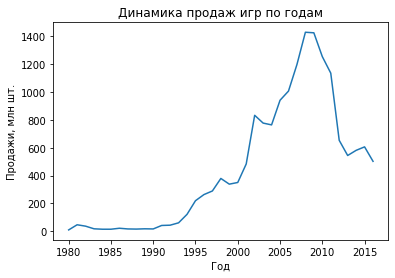

In [30]:
data_filtered.pivot_table(index='year_of_release',
                          values='name',
                          aggfunc= 'count').sort_index().plot()
# Добавленное ниже
plt.title('Динамика продаж игр по годам')
plt.xlabel("Год")
plt.ylabel("Продажи, млн шт.")
plt.legend().remove();

Данные за все периоды не важны. Особенно хорошо это видно по разному виду графиков до 2008г и после него<br>
По графику видно, что до 1993г игры выпускались в малом количестве, но с 1994г начинается рассвет игровой индустрии. Для глубокого анализа данные с 1993г могут быть использованы, но для исследования текущей ситуации на рынке стоит рассмотреть данные минимум с 2005. В дальнейшем этот диапозон будет определен точнее

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

Исследование количества продаж по платформам

In [31]:
def check_platform(data_in, num_start=None, num_end=None, value_in = 'all_sales'):
    visual_platform_per_year = pd.pivot_table(data_in, index='platform', values=value_in, aggfunc='sum')
    visual_platform_per_year = visual_platform_per_year.sort_values(value_in,ascending=False)
    visual_platform_per_year = visual_platform_per_year[num_start:num_end].reset_index()
    display(visual_platform_per_year)
    return visual_platform_per_year.reset_index()

,platform,all_sales
0,PS2,1244.11
1,X360,961.25
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,290.49
9,3DS,257.81


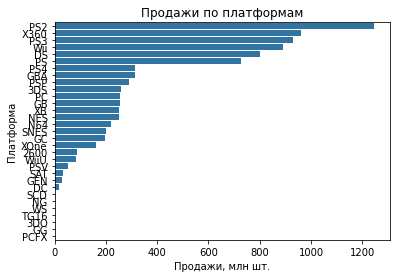

In [32]:
visual_platform_per_year = check_platform(data_filtered, num_end=None) 
sns.barplot(y=visual_platform_per_year['platform'], x=visual_platform_per_year['all_sales'])
plt.title('Продажи по платформам')
plt.xlabel("Продажи, млн шт.")
plt.ylabel("Платформа");

,platform,all_sales
0,PS2,1244.11
1,X360,961.25
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58


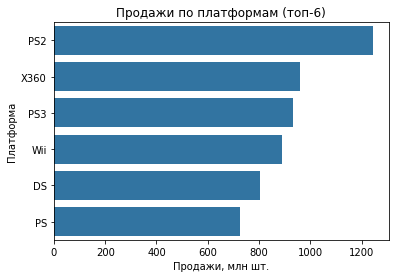

In [33]:
visual_platform_per_year = check_platform(data_filtered, num_end=6)
sns.barplot(y=visual_platform_per_year['platform'], x=visual_platform_per_year['all_sales'])
plt.title('Продажи по платформам (топ-6)')
plt.xlabel("Продажи, млн шт.")
plt.ylabel("Платформа");

**Вывод**<br>
Наиболее популярными платформами являлись PlayStation, но Xbox, Wii и DS также пользовались достаточной популярностью

Исследование времени жизни платформы

Расчетное время жизни по всем платформам

In [34]:
years_life_platform = data_filtered[['year_of_release', 'platform', 'all_sales']].groupby(by=['year_of_release', 'platform']).sum().sort_index()
years_life_platform = years_life_platform.reset_index()
print(years_life_platform)

     year_of_release platform  all_sales
0               1980     2600      11.38
1               1981     2600      35.68
2               1982     2600      28.88
3               1983     2600       5.84
4               1983      NES      10.96
..               ...      ...        ...
233             2016      PSV       4.25
234             2016      Wii       0.18
235             2016     WiiU       4.60
236             2016     X360       1.52
237             2016     XOne      26.15

[238 rows x 3 columns]


In [35]:
list_platform_life = []
for i in years_life_platform['platform'].unique():
    filtered_platform = years_life_platform.query('platform == @i')
    list_platform_life.append([i, filtered_platform['year_of_release'].max() -
                               filtered_platform['year_of_release'].min()])

df_list_platform_life = pd.DataFrame(list_platform_life,
                                     columns=['platform',
                                              'years_life']).sort_values(by='years_life',
                                                                         ascending=False).reset_index(drop=True)
df_list_platform_life

,platform,years_life
0,PC,31
1,DS,28
2,GB,13
3,PSP,11
4,X360,11
5,PS2,11
6,NES,11
7,PS3,10
8,DC,10
9,Wii,10


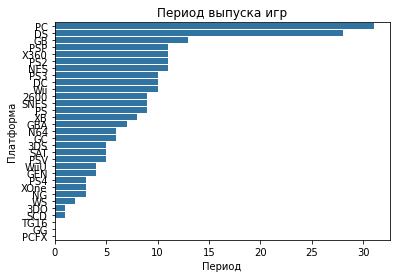

In [36]:
sns.barplot(data=df_list_platform_life,
            x=df_list_platform_life['years_life'],
            y=df_list_platform_life['platform'])
plt.title('Период выпуска игр')
plt.xlabel("Период")
plt.ylabel("Платформа");

In [37]:
df_list_platform_life.describe()

,years_life
count,31.000000
mean,7.612903
std,6.998464
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,31.000000


In [38]:
platform_top_6 = check_platform(data_filtered, num_end=6)

,platform,all_sales
0,PS2,1244.11
1,X360,961.25
2,PS3,931.34
3,Wii,891.18
4,DS,802.79
5,PS,727.58


In [39]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16460 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7472 non-null   float64
 10  rating           9781 non-null   object 
 11  all_sales        16460 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Распределение продаж платформ по годам


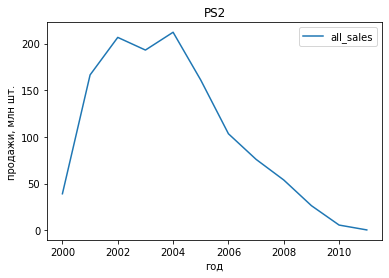

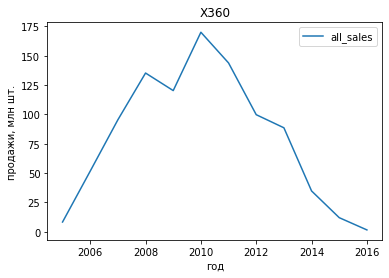

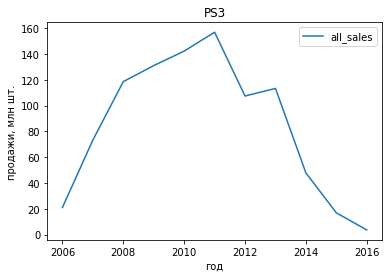

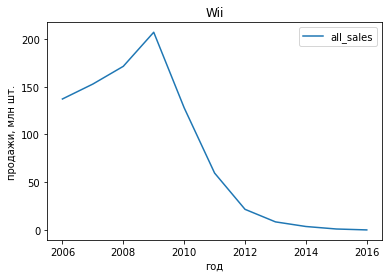

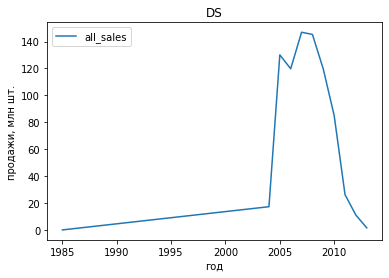

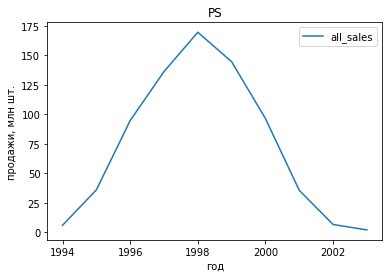

In [40]:
print('Распределение продаж платформ по годам')
list_top_platfrom = list(platform_top_6['platform'])
for i in list_top_platfrom:
    filtered_plarform = data_filtered[data_filtered['platform']==i]
    sales_period = pd.pivot_table(filtered_plarform,
                                  index=['year_of_release'],
                                  values='all_sales',
                                  aggfunc='sum')
    sales_period.plot()
    plt.xlabel("год")
    plt.ylabel("продажи, млн шт.")
    plt.title(i)

- Сравнение всех платформ: среднее время жизни платформы составляет 6-9 лет (вместе с ПК и DS)
- Сравнение самых популярны: среднее время жизни составляет 8-11 лет.

 За какой характерный срок появляются новые и исчезают старые платформы?

Для данного сравнения нам понадобятся платформы одного производителя с одинаковой направленностью. Для такого анализа подойдет серии приставок PlayStation, а также XBox 

In [41]:
list_ps = ['PS', 'PS2', 'PS3', 'PS4']
for_check_ps = data_filtered.query('platform in @list_ps')
check_ps = for_check_ps[['year_of_release',
                          'platform',
                          'all_sales']].groupby(by=['year_of_release',
                                                    'platform']).sum().sort_index()
check_ps = check_ps.reset_index()
# print(check_ps)

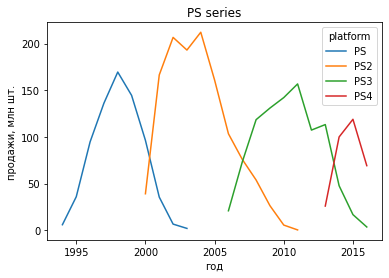

In [42]:
sns.lineplot(x=check_ps['year_of_release'],
             y=check_ps['all_sales'],
             hue=check_ps['platform'])
plt.xlabel("год")
plt.ylabel("продажи, млн шт.")
plt.title('PS series');

In [43]:
list_ps = ['X360', 'XB', 'XOne']
for_check_xb = data_filtered.query('platform in @list_ps')
check_xb = for_check_xb[['year_of_release',
                          'platform',
                          'all_sales']].groupby(by=['year_of_release',
                                                    'platform']).sum().sort_index()
check_xb = check_xb.reset_index()

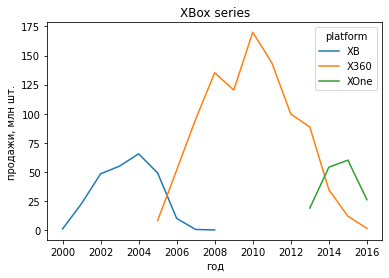

In [44]:
sns.lineplot(x=check_xb['year_of_release'],
             y=check_xb['all_sales'],
             hue=check_xb['platform'])
plt.xlabel("год")
plt.ylabel("продажи, млн шт.")
plt.title('XBox series');

Выход нового поколения приставок серии PlayStation в среднем 6 лет, для XBox 8 лет, что соответтвует минимальному диапозону жизни приставок, указанному выше при общем сравнении количества вышедших игр для рассматриваемых объектов<br>

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<br>
Не учитывайте в работе данные за предыдущие годы.

Актуальный период выбиратся в соответствии с датой выхода последнего поколения приставок, рассматриваемых выше. 2013г и позже

In [45]:
actual_period = 2013

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

In [46]:
filtered_period = data_filtered.query('year_of_release > @actual_period')

In [47]:
actual_platform = filtered_period[['year_of_release',
                                   'platform',
                                   'all_sales']].groupby(by=['year_of_release',
                                                             'platform']).sum().sort_index()
actual_platform = actual_platform.reset_index()
display(actual_platform)

,year_of_release,platform,all_sales
0,2014,3DS,43.76
1,2014,PC,13.28
2,2014,PS3,47.76
3,2014,PS4,100.00
4,2014,PSP,0.24
5,2014,PSV,11.90
6,2014,Wii,3.75
7,2014,WiiU,22.03
8,2014,X360,34.74
9,2014,XOne,54.07


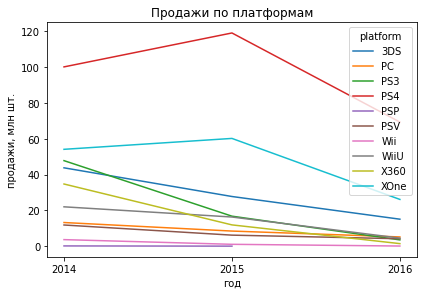

In [48]:
sns.lineplot(data=actual_platform,
             x='year_of_release',
             y='all_sales',
             hue='platform')
plt.xticks([2014, 2015, 2016]) #Добавил эту строку для корректного отображения значений по осям
plt.tight_layout()
plt.xlabel("год")
plt.ylabel("продажи, млн шт.")
plt.title('Продажи по платформам');
# sns.lineplot(data=your_data, x="x_values", y="y_values", hue="hue_column_name", interpolate=None)

По графикам можно заметить, что пик продаж был в 2015м году, но далее продажи сократились быстрее, чем выросли за 2015 год. Наибольшие продажи у последних поколений стационарних консолей Xbox и PlayStation. Первенство портативных кончолей занимаем Nintendo 3DS, поэтому приоритет можно отдать этим трем консолям.<br>
Продажи на PC довольно сложно оценить, поскольку имеется большое количество 'пиратского' софта, что вносит довольно большой вклад в продажи. Также стоит учеть, что под PC подраумевается отдельная платформа и в данном датасете не разделена по 'железу'. В таком случае можно было бы учесть особенности существующих поколений видеокарт и процессоров.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

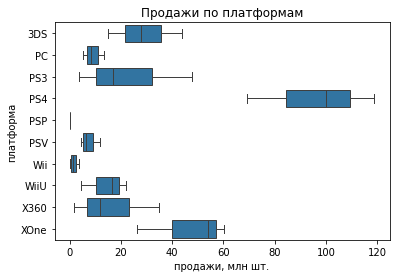

In [49]:
sns.boxplot(x='all_sales', y='platform', data=actual_platform)
#     x=actual_period['all_sales'],
#             y=actual_period['platform']);
plt.xlabel('продажи, млн шт.')
plt.ylabel('платформа')
plt.title('Продажи по платформам');

С учетом выбора актульного периода и платформ, можно сделать вывод, что стационарные консоли PlayStation являются безусловным лидером по продажам в своем направлении и занимают большую долю рынка. Аналогично можно описать и Nintendo 3DS в мире портативных консолей.

Поиск игр, занимающих топы продаж.<br>При этом стоит учесть, что количество игр, без которых можно рассмотреть популярность платформ не может быть более 3-5, иначе мы избавимся от объективной оценки платформ. На мой взгляд, стоит убрать топ-2 игр с каждой платформы.

In [50]:
check_games = filtered_period[['name',
                               'platform',
                               'all_sales']].groupby(by=['name',
                                                         'platform']).sum()
check_games = check_games.reset_index().sort_values(by='all_sales', ascending=False).head(50)
display(check_games)

,name,platform,all_sales
189,Call of Duty: Black Ops 3,PS4,14.63
553,Grand Theft Auto V,PS4,12.62
1046,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,11.68
443,FIFA 16,PS4,8.58
1319,Star Wars Battlefront (2015),PS4,7.98
184,Call of Duty: Advanced Warfare,PS4,7.66
448,FIFA 17,PS4,7.60
1354,Super Smash Bros. for Wii U and 3DS,3DS,7.55
191,Call of Duty: Black Ops 3,XOne,7.39
454,Fallout 4,PS4,7.17


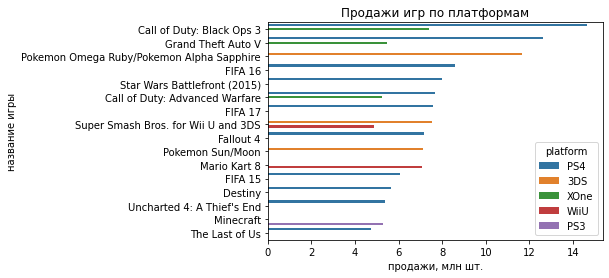

In [51]:
sns.barplot(data=check_games.head(20),
            x=check_games['all_sales'].head(20),
            y=check_games['name'].head(20),
            hue='platform')
plt.xlabel('продажи, млн шт.')
plt.ylabel('название игры')
plt.title('Продажи игр по платформам');

Проверка на явно выделяющиеся показатели игр

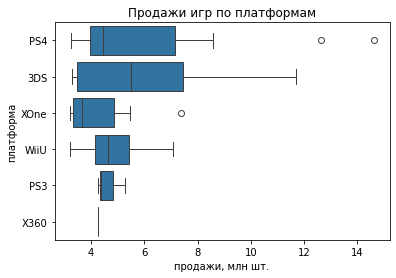

In [52]:
sns.boxplot(x='all_sales', y='platform', data=check_games)
plt.xlabel('продажи, млн шт.')
plt.ylabel('платформа')
plt.title('Продажи игр по платформам');

Среди лидирующих продаж есть выбросы двух игр для PS4, а также одной для XOne, поэтому теорию о выбивающихся топ-2 игр для каждой платформы считаю подходящей.<br>Далее отбираем игры ниже топ-2 по платформе

In [53]:
check_platfrom = list(actual_platform['platform'].unique())
list_platfrom = []
list_games = []
list_sales = []
check_platfrom

['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

In [54]:
not_in_other_games = check_games.head(0)
display(not_in_other_games)
for i in check_platfrom:
    check_data_games = filtered_period[filtered_period['platform']==i]
    check_data_games = check_data_games[['name',
                                         'platform',
                                         'all_sales']].groupby(by=['name',
                                                                   'platform']).sum().sort_index()
    not_in_other_games = pd.concat([check_data_games.reset_index().sort_values(by='all_sales',
                                                                               ascending=False).head(2), not_in_other_games]).reset_index(drop=True)
not_in_other_games['top_2'] = True
not_in_other_games = not_in_other_games[['name','platform','top_2']]
display(not_in_other_games)

,name,platform,all_sales


,name,platform,top_2
0,Call of Duty: Black Ops 3,XOne,True
1,Grand Theft Auto V,XOne,True
2,Call of Duty: Advanced Warfare,X360,True
3,FIFA 15,X360,True
4,Mario Kart 8,WiiU,True
5,Super Smash Bros. for Wii U and 3DS,WiiU,True
6,Just Dance 2015,Wii,True
7,Just Dance 2016,Wii,True
8,Minecraft,PSV,True
9,Freedom Wars,PSV,True


In [55]:
to_boxplot = filtered_period.merge(not_in_other_games,on=['name','platform'], how='left')
print(f"before: {len(to_boxplot)}")
to_boxplot = to_boxplot[to_boxplot['top_2']!=True]
print(f"after: {len(to_boxplot)}")

before: 1689
after: 1669


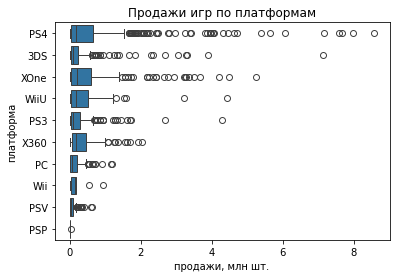

In [56]:
sns.boxplot(x='all_sales', y='platform', data=to_boxplot)
plt.xlabel('продажи, млн шт.')
plt.ylabel('платформа')
plt.title('Продажи игр по платформам');

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [57]:
list_actual_platform = ['PS3', 'X360', 'PS4', 'XOne', '3DS', 'PSV']

In [58]:
filtered_period.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  all_sales        1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


In [59]:
def score_correlation(data_in, i):
    data_cur = data_in[data_in['platform']==list_actual_platform[i]]
    data_cur = data_cur[['all_sales', 'critic_score', 'user_score']]
    sns.pairplot(data_cur)
    plt.title(i);
    display(data_cur.corr());

'PS3'

,all_sales,critic_score,user_score
all_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


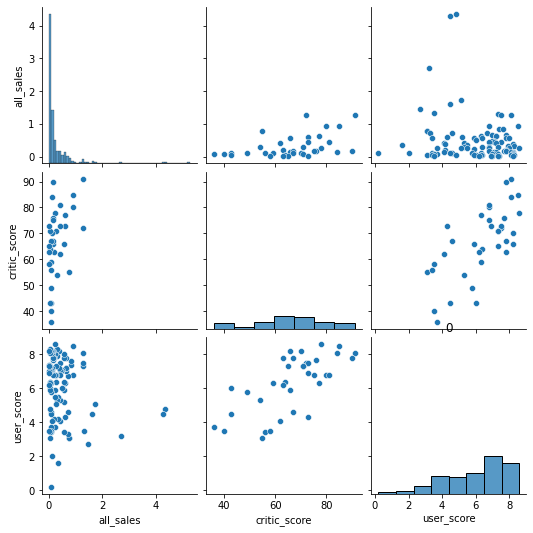

In [60]:
ptafrom_i = 0
display(list_actual_platform[ptafrom_i])
score_correlation(filtered_period, ptafrom_i)

'X360'

,all_sales,critic_score,user_score
all_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


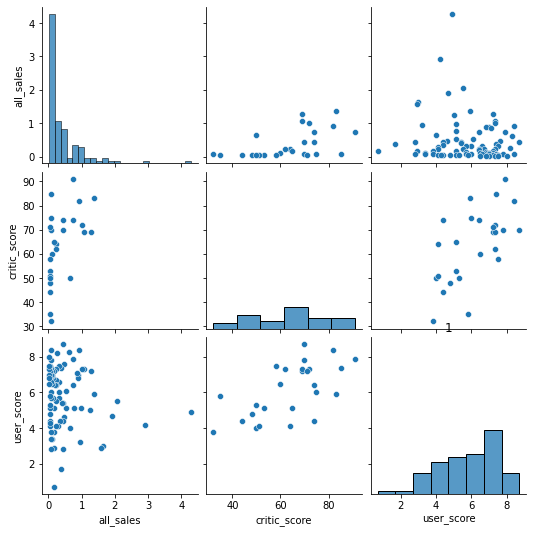

In [61]:
ptafrom_i = 1
display(list_actual_platform[ptafrom_i])
score_correlation(filtered_period, ptafrom_i)

'PS4'

,all_sales,critic_score,user_score
all_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


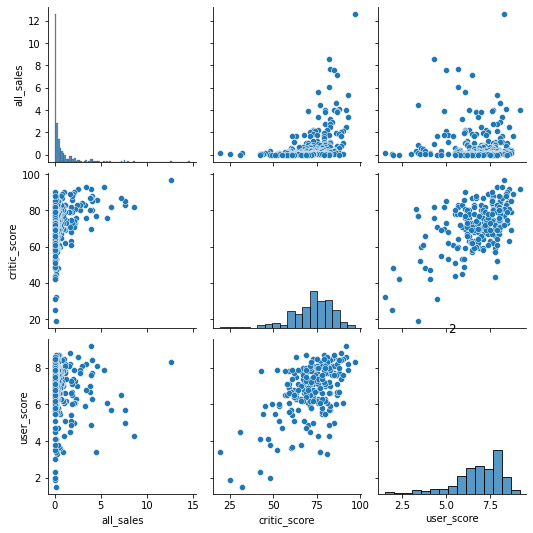

In [62]:
ptafrom_i = 2
display(list_actual_platform[ptafrom_i])
score_correlation(filtered_period, ptafrom_i)

'XOne'

,all_sales,critic_score,user_score
all_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


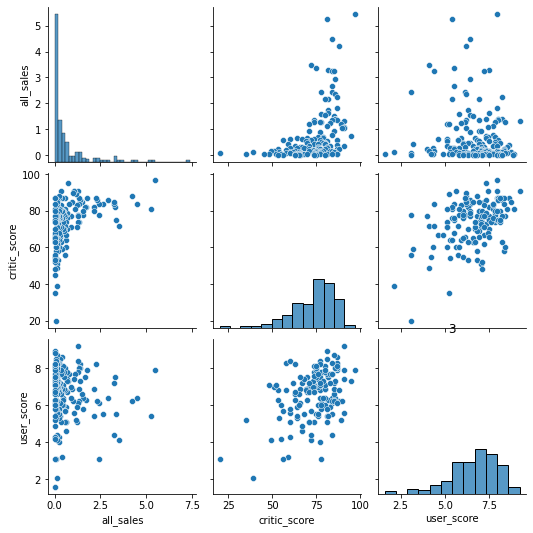

In [63]:
ptafrom_i = 3
display(list_actual_platform[ptafrom_i])
score_correlation(filtered_period, ptafrom_i)

'3DS'

,all_sales,critic_score,user_score
all_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


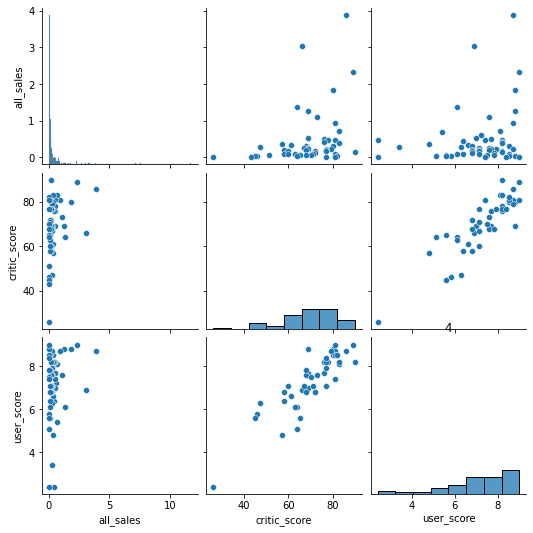

In [64]:
ptafrom_i = 4
display(list_actual_platform[ptafrom_i])
score_correlation(filtered_period, ptafrom_i)

'PSV'

,all_sales,critic_score,user_score
all_sales,1.000000,0.042665,-0.168455
critic_score,0.042665,1.000000,0.524066
user_score,-0.168455,0.524066,1.000000


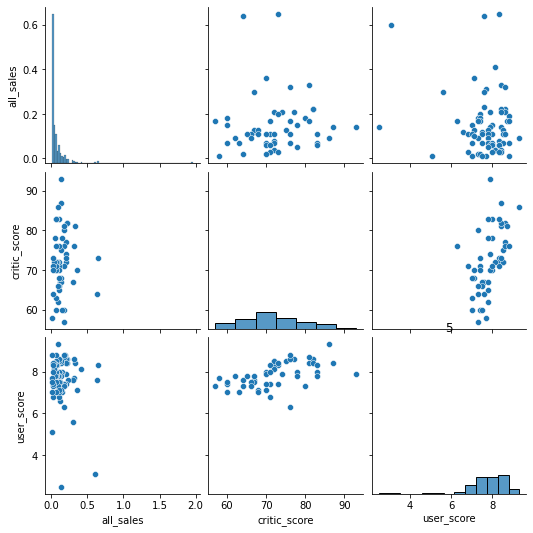

In [65]:
ptafrom_i = 5
display(list_actual_platform[ptafrom_i])
score_correlation(filtered_period, ptafrom_i)

- По всем зависимостям оценки критиков и пользователей положительно влияют на продажи;
- Оценки критиков и пользователей имеют линейную зависимость;
- Стационарные консоли: большее влияние оказывают отзывы критиков;
- Портативные консоли: большее влияние оказывают отзывы пользователей

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Если для предыдущего анализа были необходимы все записи для каждой платформы, то для анализа необходимо агрегировать данные до названия игры

In [66]:
print(f"количество записей всего {len(filtered_period)}")
distinct_games_genre = filtered_period[['name',
                                        'genre',
                                        'all_sales']].groupby(by=['name',
                                                                  'genre']).sum().reset_index()
print(f"количество записей уникальных {len(distinct_games_genre)}")
distinct_games_genre

количество записей всего 1689
количество записей уникальных 956


,name,genre,all_sales
0,Beyblade Burst,Role-Playing,0.03
1,Fire Emblem Fates,Role-Playing,1.67
2,Haikyu!! Cross Team Match!,Adventure,0.04
3,12-Sai. Honto no Kimochi,Adventure,0.07
4,12-Sai. Koisuru Diary,Adventure,0.05
...,...,...,...
951,Zettai Kaikyuu Gakuen: Eden with Roses and Pha...,Adventure,0.01
952,ZombiU,Action,0.07
953,Zombie Army Trilogy,Shooter,0.31
954,htoL#NiQ: The Firefly Diary,Platform,0.01


In [67]:
def check_genre(data_in, agregation ='sum', num_start=None, num_end=None, value_in='all_sales'):
    visual_platform_per_year = pd.pivot_table(data_in, index='genre', values=value_in, aggfunc=agregation)
    visual_platform_per_year = visual_platform_per_year.sort_values(value_in,ascending=False)
    visual_platform_per_year = visual_platform_per_year[num_start:num_end].reset_index()
    display(visual_platform_per_year)
    return visual_platform_per_year.reset_index()

,genre,all_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


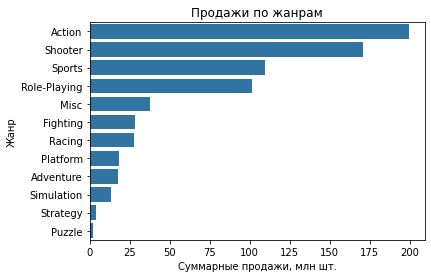

In [68]:
visual_platform_per_year = check_genre(distinct_games_genre, num_end=None) 
sns.barplot(y=visual_platform_per_year['genre'], x=visual_platform_per_year['all_sales'])
plt.title('Продажи по жанрам')
plt.xlabel("Суммарные продажи, млн шт.")
plt.ylabel("Жанр");

,genre,all_sales
0,Shooter,3.351765
1,Sports,1.990545
2,Racing,0.982857
3,Fighting,0.830000
4,Platform,0.822273
5,Role-Playing,0.671788
6,Action,0.589822
7,Misc,0.514384
8,Simulation,0.375143
9,Puzzle,0.221000


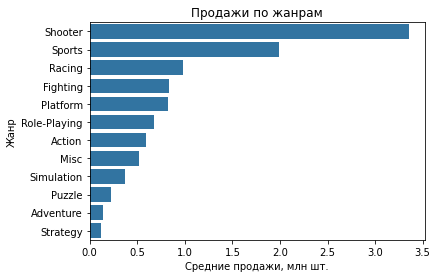

In [69]:
visual_platform_per_year = check_genre(distinct_games_genre, agregation='mean', num_end=None) 
sns.barplot(y=visual_platform_per_year['genre'], x=visual_platform_per_year['all_sales'])
plt.title('Продажи по жанрам')
plt.xlabel("Средние продажи, млн шт.")
plt.ylabel("Жанр");

,genre,all_sales
0,Shooter,1.620
1,Sports,0.450
2,Platform,0.415
3,Racing,0.405
4,Fighting,0.190
5,Role-Playing,0.150
6,Action,0.090
7,Misc,0.090
8,Puzzle,0.070
9,Strategy,0.060


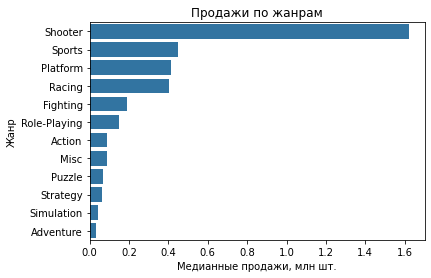

In [70]:
visual_platform_per_year = check_genre(distinct_games_genre, agregation='median', num_end=None) 
sns.barplot(y=visual_platform_per_year['genre'], x=visual_platform_per_year['all_sales'])
plt.title('Продажи по жанрам')
plt.xlabel("Медианные продажи, млн шт.")
plt.ylabel("Жанр");

- Наибольшее количество продаж у жанров 'Action', 'Sports', 'Shooter'. Т.е. наболее прибыльными являются жанры связанные с активными действиями. Противоположно с жанрами для ценителей подумать;
- Показатели по мединным значениям и средним похожи между собой, и мало отличаются от показателей по доходу от предыдущего варианта. В последних случаям превалирует качество пратформеров, шутеров и спортивных игр.<br>
Исходя из сравнения, можно сделать вывод, что, скорее всего, имеются небольшое количество компаний (и соответственно игр), которые делают наиболее продаваемые игры по жанру 'Action''. 

,genre,all_sales
0,Action,338
1,Role-Playing,151
2,Adventure,127
3,Misc,73
4,Sports,55
5,Shooter,51
6,Simulation,35
7,Fighting,34
8,Strategy,32
9,Racing,28


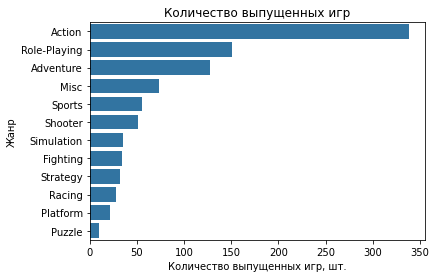

In [71]:
visual_platform_per_year = check_genre(distinct_games_genre, agregation='count', num_end=None) 
sns.barplot(y=visual_platform_per_year['genre'], x=visual_platform_per_year['all_sales'])
plt.title('Количество выпущенных игр')
plt.xlabel("Количество выпущенных игр, шт.")
plt.ylabel("Жанр");

График показывает, что скорее всего, теория для жанра 'Action' подтверждается. Возможно другие компании также исследуя наиболее доходные жанры начали производить игры по ним,не оценив конкурентов. В то же время, шутеры скорее всего являются наиболее качественными и популярными для своей аудитории.

**Общий вывод к п.3:**<br>
Проведен анализ продаж игр по платформам и жанрам. Найдены лидеры среди консолей, а также предпочтения большей части пользователей. Выявлено влияние оценок пользователей на покупку игр.<br>
1) Лидерами среди стационарных платформ являюся PlayStation и Xbox;
2) Лидер среди портативных консолей Nintendo;
3) Большинство игр продаются для стационарных версий консолей;
4) Наиболее популярными жанрами являются 'Action', 'Shooter', 'Sports', 'Role-Playing';
5) Наибольшее количество игр выпущена по жанру 'Action', но, по всей видимости, в этом жанре преобладает малая серия игр;
6) Несмотря на то, что оценки пользователей и критиков коррелируют между собой, для стационарной платформы большее влияние имеет оценка критика, для портативной - пользователя

# Шаг 4. Составьте портрет пользователя каждого региона

In [72]:
filtered_period_place = filtered_period

In [73]:
def check_rating(data_in, agregation ='sum', num_start=None, num_end=None, value_in='all_sales'):
    visual_platform_per_year = pd.pivot_table(data_in, index='rating', values=value_in, aggfunc=agregation)
    visual_platform_per_year = visual_platform_per_year.sort_values(value_in,ascending=False)
    visual_platform_per_year = visual_platform_per_year[num_start:num_end].reset_index()
    display(visual_platform_per_year)
    return visual_platform_per_year.reset_index()

In [74]:
def filter_data_place(place):
    return filtered_period[filtered_period[place] > 0]

In [75]:
def full_pie_platfrom(place):
    visual_platform_per_year = check_platform(filtered_period_place, value_in =place)
    plt.pie(visual_platform_per_year[place],
            labels=visual_platform_per_year['platform'],
            autopct='%1.1f%%')
    plt.title('Доля продаж по платформам')
    return visual_platform_per_year

In [76]:
def visual_top(filtered_period_na, place):
    visual_platform_per_year = check_platform(filtered_period_na, num_end=5, value_in=place)
    sns.barplot(y=visual_platform_per_year['platform'],
                x=visual_platform_per_year[place])
    plt.title('Продажи по платформам (топ-5)')
    plt.xlabel("Продажи, млн шт.")
    plt.ylabel("Платформа")
    return visual_platform_per_year

In [77]:
def pie_all(visual_platform_per_year, place):
    plt.pie(visual_platform_per_year[place],
            labels=visual_platform_per_year['platform'],
            autopct='%1.1f%%')
    plt.title('Доля продаж по платформам (среди топ-5)');

In [78]:
def check_genre_pie(filtered_period_place, place):
    na_genre_rating = check_genre(filtered_period_place,
                                  value_in=place)
    to_explode = [0,0,0,0,0,0,0,0,0,0,1.2,1.2]
    plt.pie(na_genre_rating[place],
            labels=na_genre_rating['genre'],
            explode=to_explode,
            autopct='%1.1f%%')
    plt.title('Доля продаж по жанрам');

In [79]:
def visual_rating(filtered_period_na, place):
    visual_platform_per_year = check_rating(filtered_period_na, value_in=place)
    plt.pie(visual_platform_per_year[place],
            labels=visual_platform_per_year['rating'],
            autopct='%1.1f%%')
    plt.title('Доля продаж по рейтингу')


Описание пользователей NA

In [80]:
filtered_period_place = filter_data_place('na_sales')

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08


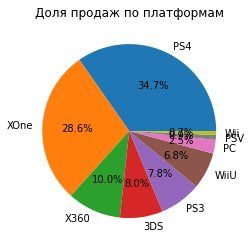

In [81]:
visual_platform_per_year = full_pie_platfrom('na_sales')

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


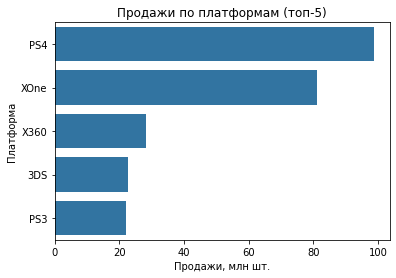

In [82]:
visual_platform_per_year = visual_top(filtered_period_place, 'na_sales')

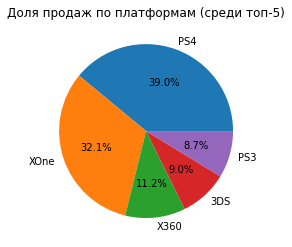

In [83]:
pie_all(visual_platform_per_year, 'na_sales')

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


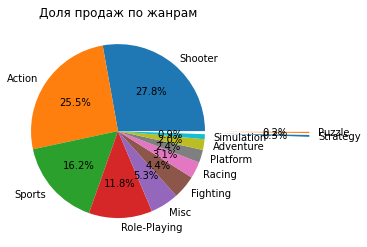

In [84]:
check_genre_pie(filtered_period_place, 'na_sales')

,rating,na_sales
0,M,96.42
1,E,50.74
2,T,38.95
3,E10+,33.23


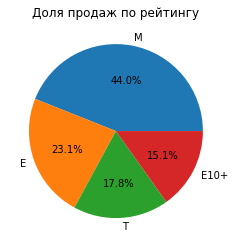

In [85]:
visual_rating(filtered_period_place, 'na_sales')

**Вывод по пользователям NA**<br>
- Использует стационарную консоль. Наиболее вероятно PlayStation или Xbox<br>
- Основные жанры 'Action', 'Shooter', 'Sports'. Логические игры являются наименее популярными<br>
- Наибольшая доля рейтинга принадлежит 'M'

Описание пользователей EU

In [86]:
filtered_period_place = filter_data_place('eu_sales')

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59


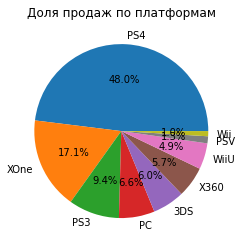

In [87]:
visual_platform_per_year = full_pie_platfrom('eu_sales')

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


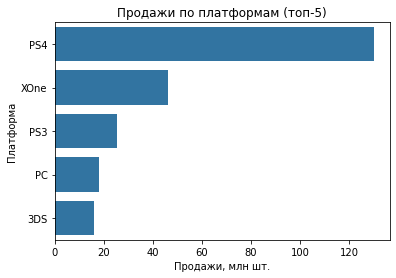

In [88]:
visual_platform_per_year = visual_top(filtered_period_place, 'eu_sales')

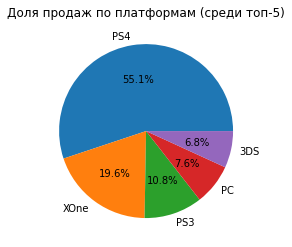

In [89]:
pie_all(visual_platform_per_year, 'eu_sales')

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


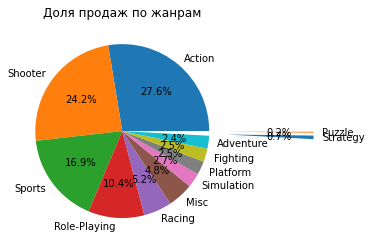

In [90]:
check_genre_pie(filtered_period_place, 'eu_sales')

,rating,eu_sales
0,M,93.44
1,E,58.06
2,T,34.07
3,E10+,26.16


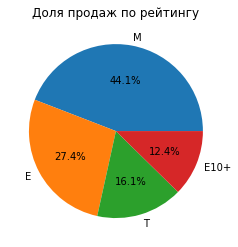

In [91]:
visual_rating(filtered_period_place, 'eu_sales')

**Вывод по пользователям EU**<br>
- Использует стационарную консоль. Наиболее вероятно PlayStation или Xbox. Также в рейтинге появился PC<br>
- Основные жанры 'Action', 'Shooter', 'Sports'. Логические игры являются наименее популярными<br>
- Наибольшая доля рейтинга принадлежит 'M'

Описание пользователей JP

In [92]:
filtered_period_place = filter_data_place('jp_sales')

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08


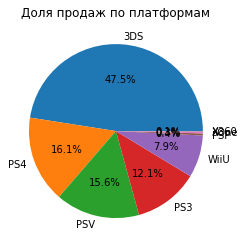

In [93]:
visual_platform_per_year = full_pie_platfrom('jp_sales')

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


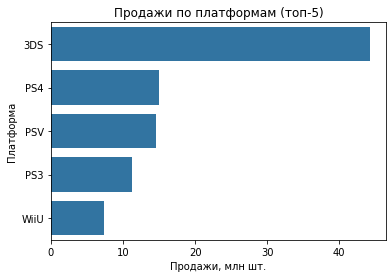

In [94]:
visual_platform_per_year = visual_top(filtered_period_place, 'jp_sales')

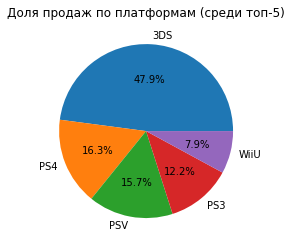

In [95]:
pie_all(visual_platform_per_year, 'jp_sales')

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


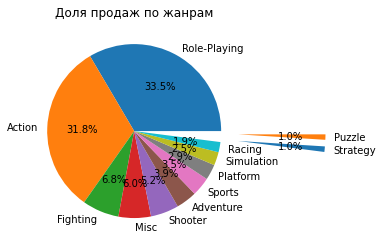

In [96]:
check_genre_pie(filtered_period_place, 'jp_sales')

,rating,jp_sales
0,T,14.78
1,E,8.94
2,M,8.01
3,E10+,4.46


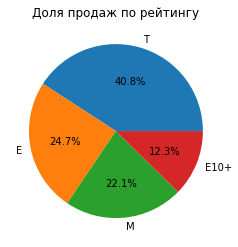

In [97]:
visual_rating(filtered_period_place, 'jp_sales')

**Вывод по пользователям JP**<br>
- Использует портативную консоль Nintendo. Из стационарных превалируюет PlayStation<br>
- Основные жанры 'Action', 'Role-Playing'. Логические игры являются наименее популярными<br>
- Наибольшая доля рейтинга принадлежит 'T'

**Общий вывод по п.5**<br>
Пользователи NA, EU схожи по всем показателям и проедпочитают портативные консоли. Основными жанрами являются 'Action', 'Shooter', 'Sports'. Рейтинг игр 'M'<br>
Пользователи JP отличаются от группы выше и предпочитают портативные консоли. Общим жанром с предыдущей группой является 'Action'. 'Role-Playing' остается присущ игрокам JP.

# Шаг 5. Проверьте гипотезы

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Используется тест Стюдента
1) Нулевая гипотеза: средние пользовательские рейтинги равны
2) Альтернативаня гипотеза: средние пользовательские рейтинги не равны

In [98]:
users_xbox = filtered_period[filtered_period['platform'] == 'XOne']
score_users_xbox = users_xbox[users_xbox['user_score'].isna()==False]['user_score']

In [99]:
users_pc = filtered_period[filtered_period['platform'] == 'PC']
score_users_pc = users_pc[users_pc['user_score'].isna()==False]['user_score']

In [100]:
alpha = 0.01

results = st.ttest_ind(score_users_xbox, score_users_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Используется тест Стюдента
1) Нулевая гипотеза: средние пользовательские рейтинги равны
2) Альтернативаня гипотеза: средние пользовательские рейтинги не равны

In [101]:
users_action = filtered_period[filtered_period['genre'] == 'Action']
score_users_action = users_action[users_action['user_score'].isna()==False]['user_score']
# score_users_action

In [102]:
users_sports = filtered_period[filtered_period['genre'] == 'Sports']
score_users_sports = users_sports[users_sports['user_score'].isna()==False]['user_score']
# score_users_sports

In [103]:
alpha = 0.01

results = st.ttest_ind(score_users_action, score_users_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Общий вывод к п.5**<br>
1) Гипотеза о том, что пользователи платформ 'Xbor One' и 'PC' ставят схожие оценки подтвердилась, но стоит обратить внимание, что обе платформы стационарные и сценарий их использования похож;
2) Гипотеза о разности рейтингов по жанрам подтвердилась

# 6. Итоговый вывод<br>
**Общий вывод**<br>
Обработаны исходные данные и подготовлены к анализу с потерей ~1.5%., что является приемлемым<br>
Был прведен анализ данных по выпущенным играм во времени, платформам, жанрам и рейтингу игр в каждом регионе. Каждый из этих параметров влияет на продажи в конкретном регионе. Наибольшее влияние оказывает регион<br>
Однозначно лидирующие позиции в продажах занмают игры жанра 'Action', выпущнные для консолей 'PS4' независимо от региона<br>
<br>
**Вывод для разработчиков игр**<br>
В зависимости от цели компании наблюдается несколько вариантов:
1) Закрепиться на рынке:
   - Выпускать игры в стиле 'Shooter', 'Sports', 'Platform', 'Racing';
   - Целевой платформой выбрать текущие топовые стационарные консоли, преимущественно 'PS4';
   - Целевой рейтинг 'M'
   - Учесть регион для которого выпускается игра
2) Получить высокую прибыль:
   - Выпускать игры жанра 'Shooter', 'Sports' (для рынков EU, NA) или 'Role-Playing' (для JP);
   - Целевой платформой выбрать PS4 (для рынков EU, NA) или Nintendo (для JP);
   - Целевой рейтинг 'M' (для рынков EU, NA) или 'T' (для JP)<br>
В обоих случаях стоит избегать жанра 'Action', поскольку в этом жанре или слишком жесткая конкуренция, или завышенные ожидания пользователей